# Tomato Disease Classification

## 1.Problem

> We are trying to detect disease in tomatos, specifically the Bacterial Spot, Early blight, late blight, Leaf Mold, Septoria Leaf Spot, Spider Mites Two Spotted Spider Mite, Target Spot, YellowLeaf Curl Virus and Tomato Mosaic Virus disease in tomato which are causing economic harm to tomato farmers.

## 2. Data

> The data we are using has been provided by the kaggle website under the Plant Village Dataset. It has various other datasets on it but we are only using the tomato datasets here.

Link -> https://www.kaggle.com/arjuntejaswi/plant-village

## 3. Evaluation

> We will be training the model on the training dataset and evaluating it on the test dataset.

## 4. Features

* Dealing with images of tomato(unstructured data). Deep learning(CNN) is used.

* There are ten categories which are Bacterial Spot, Early blight, late blight, Leaf Mold, Septoria Leaf Spot, Spider Mites Two Spotted Spider Mite, Target Spot, YellowLeaf Curl Virus, Tomato Mosaic Virus and healthy tomatos.

* There are around 1000 photos or more for each of the categories of diseases in tomato images and ~1500 for healthy tomato images.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

## Importing the dataset from Google Drive

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Dataset_tomato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 3368 files belonging to 3 classes.


In [4]:
dataset.class_names

['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [5]:
class_names=dataset.class_names
class_names

['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [6]:
len(dataset)  # Batches

106

In [ ]:
# 501 * 32 == 16032(Total Images)

In [7]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(label_batch.numpy())

(32, 256, 256, 3)
[2 0 2 2 2 2 0 0 1 0 2 2 1 2 1 0 0 2 1 2 0 0 2 0 2 0 1 0 0 0 0 0]


## Visualizing the images

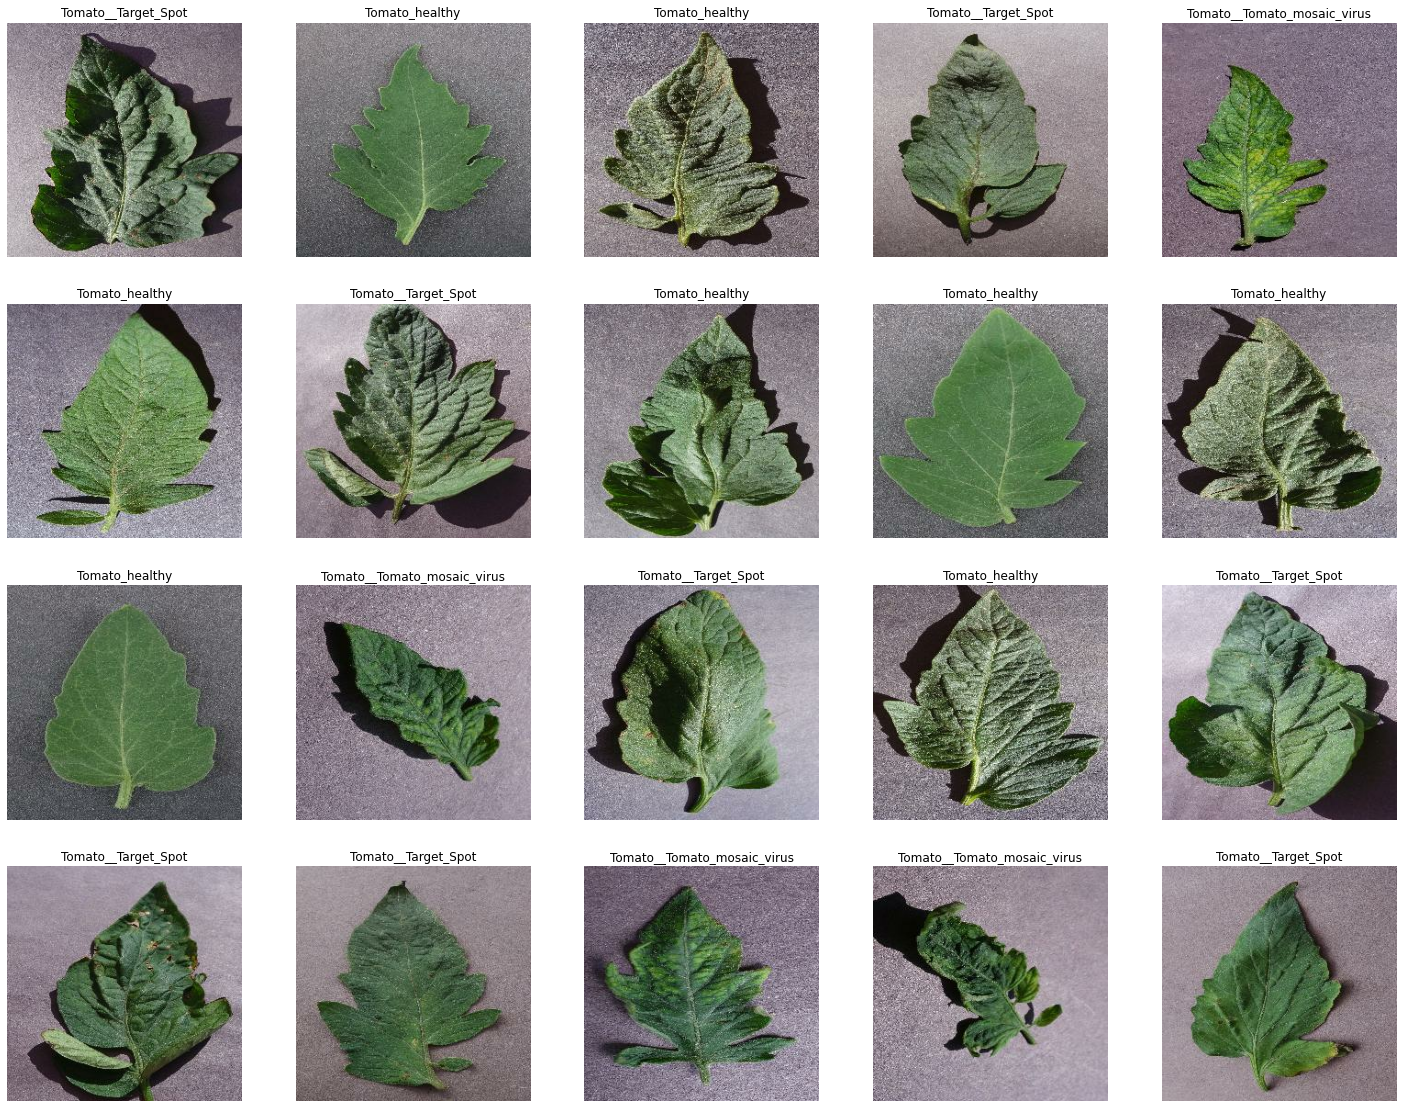

In [8]:
plt.figure(figsize=(25,25))
for image_batch, label_batch in dataset.take(1):
  for i in range(20):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(image_batch[i].numpy().astype('uint8'))
    plt.title(class_names[label_batch[i]])
    plt.axis('off') # Image is random as we have 'shuffle=True'

## Splitting the datasets

In [9]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=69)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size) 
    rest_ds= ds.skip(train_size)
    val_ds = rest_ds.take(val_size)
    test_ds = rest_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [10]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)
len(train_ds), len(val_ds), len(test_ds)

(84, 10, 12)

In [ ]:
400 + 50 + 51

501

## Increasing performance of training the model

> We are using `Prefetch() and cache()` to optimize the time required to train the model

In [11]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## Resize and Scaling

> We will be providing them to the last/final iteration of the model, when it is predicting on images so that it gets the right size of the supplied images and the scalling of the images is same as when it was training on the training dataset images.

In [12]:
resize_AND_rescale= tf.keras.Sequential([
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.Rescaling(1.0/255)
])

## Data Augmentation

> It is used to increase the size of the dataset and create variation of the same image and the performance of predicting if the potato is healthy or has some disease also increases. 

> This will also be used in the last/final iteration of the model.

In [13]:
data_augmentation=tf.keras.Sequential([
           layers.RandomFlip('horizontal_and_vertical'),
           layers.RandomRotation(0.2),
           layers.RandomContrast(0.5),                       
])

In [14]:
class_names

['Tomato__Target_Spot', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']

In [15]:
len(class_names)

3

In [16]:
n_classes=len(class_names)
n_classes

3

## Building the model

In [17]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=len(class_names)

cnn= models.Sequential([
                          resize_AND_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax'),

])

cnn.build(input_shape=input_shape)

In [18]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [19]:
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
            metrics=['accuracy']
)

In [20]:
%%time
history=cnn.fit(train_ds,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=True,
                validation_data=val_ds
                )

Epoch 1/10
84/84 [==============================] - 256s 250ms/step - loss: 0.9136 - accuracy: 0.5409 - val_loss: 0.9068 - val_accuracy: 0.6313
Epoch 2/10
84/84 [==============================] - 12s 139ms/step - loss: 0.6073 - accuracy: 0.7699 - val_loss: 0.4051 - val_accuracy: 0.8562
Epoch 3/10
84/84 [==============================] - 12s 138ms/step - loss: 0.4230 - accuracy: 0.8397 - val_loss: 0.2061 - val_accuracy: 0.9125
Epoch 4/10
84/84 [==============================] - 12s 138ms/step - loss: 0.3515 - accuracy: 0.8731 - val_loss: 0.2614 - val_accuracy: 0.9000
Epoch 5/10
84/84 [==============================] - 12s 138ms/step - loss: 0.2851 - accuracy: 0.9005 - val_loss: 0.3635 - val_accuracy: 0.8719
Epoch 6/10
84/84 [==============================] - 12s 138ms/step - loss: 0.2642 - accuracy: 0.8994 - val_loss: 0.4456 - val_accuracy: 0.8250
Epoch 7/10
84/84 [==============================] - 12s 139ms/step - loss: 0.1875 - accuracy: 0.9324 - val_loss: 0.3118 - val_accuracy: 0.878

## Dataset Part 1, next 3 categories

In [21]:
dataset_1=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Dataset_tomato_1",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 6926 files belonging to 3 classes.


In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=69)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size) 
    rest_ds= ds.skip(train_size)
    val_ds = rest_ds.take(val_size)
    test_ds = rest_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [24]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset_1)
len(train_ds), len(val_ds), len(test_ds)

(173, 21, 23)

In [25]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_AND_rescale= tf.keras.Sequential([
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.Rescaling(1.0/255)
])

data_augmentation=tf.keras.Sequential([
           layers.RandomFlip('horizontal_and_vertical'),
           layers.RandomRotation(0.2),
           layers.RandomContrast(0.5),                       
])

In [26]:
n_classes=len(class_names)
n_classes

3

In [27]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=len(class_names)

cnn= models.Sequential([
                          resize_AND_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax'),

])

cnn.build(input_shape=input_shape)

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [28]:
%%time
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
            metrics=['accuracy']
)


history=cnn.fit(train_ds,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=True,
                validation_data=val_ds
                )

Epoch 1/10
173/173 [==============================] - 682s 264ms/step - loss: 0.7825 - accuracy: 0.6292 - val_loss: 1.2539 - val_accuracy: 0.5699
Epoch 2/10
173/173 [==============================] - 24s 140ms/step - loss: 0.4832 - accuracy: 0.8007 - val_loss: 0.3858 - val_accuracy: 0.8705
Epoch 3/10
173/173 [==============================] - 24s 138ms/step - loss: 0.3737 - accuracy: 0.8561 - val_loss: 0.2993 - val_accuracy: 0.8854
Epoch 4/10
173/173 [==============================] - 24s 138ms/step - loss: 0.3377 - accuracy: 0.8711 - val_loss: 0.3414 - val_accuracy: 0.9048
Epoch 5/10
173/173 [==============================] - 24s 138ms/step - loss: 0.3300 - accuracy: 0.8735 - val_loss: 0.3021 - val_accuracy: 0.8824
Epoch 6/10
173/173 [==============================] - 24s 138ms/step - loss: 0.2435 - accuracy: 0.9092 - val_loss: 0.2641 - val_accuracy: 0.9167
Epoch 7/10
173/173 [==============================] - 24s 138ms/step - loss: 0.2078 - accuracy: 0.9217 - val_loss: 0.6631 - val_a

## Dataset part 2, next 3 categories

In [29]:
dataset_2=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Dataset_tomato_2",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    )

Found 4500 files belonging to 3 classes.


In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=69)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size) 
    rest_ds= ds.skip(train_size)
    val_ds = rest_ds.take(val_size)
    test_ds = rest_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset_2)
len(train_ds), len(val_ds), len(test_ds)

(112, 14, 15)

In [32]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_AND_rescale= tf.keras.Sequential([
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.Rescaling(1.0/255)
])

data_augmentation=tf.keras.Sequential([
           layers.RandomFlip('horizontal_and_vertical'),
           layers.RandomRotation(0.2),
           layers.RandomContrast(0.5),                       
])

In [33]:
n_classes=len(class_names)
n_classes

3

In [34]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=len(class_names)

cnn= models.Sequential([
                          resize_AND_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax'),

])

cnn.build(input_shape=input_shape)

cnn.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 sequential_7 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 127, 127, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 62, 62, 64)         0         
 g2D)                                                 

In [ ]:
%%time
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
            metrics=['accuracy']
)


history=cnn.fit(train_ds,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=True,
                validation_data=val_ds
                )

Epoch 1/10


## Dataset part 3, the last categories

In [ ]:
dataset_3=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/Dataset_tomato_3",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    )

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=69)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size) 
    rest_ds= ds.skip(train_size)
    val_ds = rest_ds.take(val_size)
    test_ds = rest_ds.skip(val_size)
    
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset_3)
len(train_ds), len(val_ds), len(test_ds)

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

resize_AND_rescale= tf.keras.Sequential([
        layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
        layers.Rescaling(1.0/255)
])

data_augmentation=tf.keras.Sequential([
           layers.RandomFlip('horizontal_and_vertical'),
           layers.RandomRotation(0.2),
           layers.RandomContrast(0.5),                       
])

In [ ]:
class_names=dataset.class_names
class_names
len(class_names)

In [ ]:
n_classes=len(class_names)
n_classes

In [ ]:
input_shape=(BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes=len(class_names)

cnn= models.Sequential([
                          resize_AND_rescale,
                          data_augmentation,
                          layers.Conv2D(32,(3,3), activation='relu', input_shape=input_shape),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(64,(3,3), activation='relu'),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(64, activation='relu'),
                          layers.Dense(n_classes, activation='softmax'),

])

cnn.build(input_shape=input_shape)

cnn.summary()

In [ ]:
%%time
cnn.compile(optimizer='adam', 
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
            metrics=['accuracy']
)


history=cnn.fit(train_ds,
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                verbose=True,
                validation_data=val_ds
                )